# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

# Remove Deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Load feature names.

In [10]:
feature_names = []
with open('/Users/matthewpotts/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [11]:
X, Y = [], []

with open('/Users/matthewpotts/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

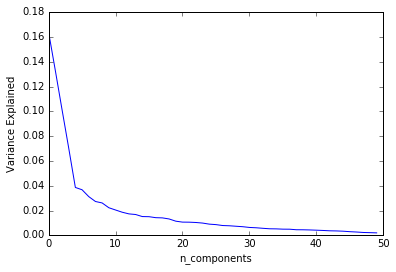

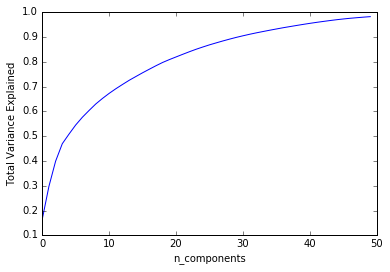

0.982102741605 percent of the total variance in the training data is explained by the first k principal components, for k in [1, 50]


In [12]:
def P1(k_values):

    # Define the number of n_components
    pca = PCA(n_components=k_values)
    pca.fit(train_data)
    n_components = []
    k_variance = []
    k_variance_total = []
    variance_sum = 0
    
    # run loop to get each explained variance and then a sum of total per n_component
    for i in range(k_values):
        variance_sum += pca.explained_variance_ratio_[i]
        k_variance.append(pca.explained_variance_ratio_[i])
        k_variance_total.append(variance_sum)
        n_components.append(i)
    
    # plot the variance and total variance by n_components
    plt.plot(n_components, k_variance)
    plt.xlabel('n_components')
    plt.ylabel('Variance Explained')
    plt.show()
    
    plt.plot(n_components, k_variance_total)
    plt.xlabel('n_components')
    plt.ylabel('Total Variance Explained')
    plt.show()
    
    print str(variance_sum) + " percent of the total variance in the training data is explained by the first k principal components, for k in [1, 50]"

P1(50)

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

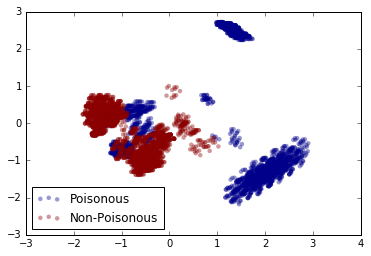

In [13]:
def P2():
    # run pca with 2 components and transform into 2d
    pca = PCA(n_components = 2)
    data = pca.fit_transform(train_data)
    
    # create two arrays for poisonous and non-poisonous pca arrays
    poison = data[np.where(train_labels == 1)]
    no_poison = data[np.where(train_labels == 0)]
    
    # overlay two plots with the poisonous and non-poisonous data
    plt.scatter(poison[: ,0], poison[: ,1], c='darkblue', alpha = 0.4, s = 20, edgecolors= '', label = 'Poisonous')
    plt.scatter(no_poison[: ,0], no_poison[: ,1], c='darkred', alpha = 0.4, s = 20, edgecolors= '', label = 'Non-Poisonous')
    plt.legend(loc = 'lower left')
    plt.show

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

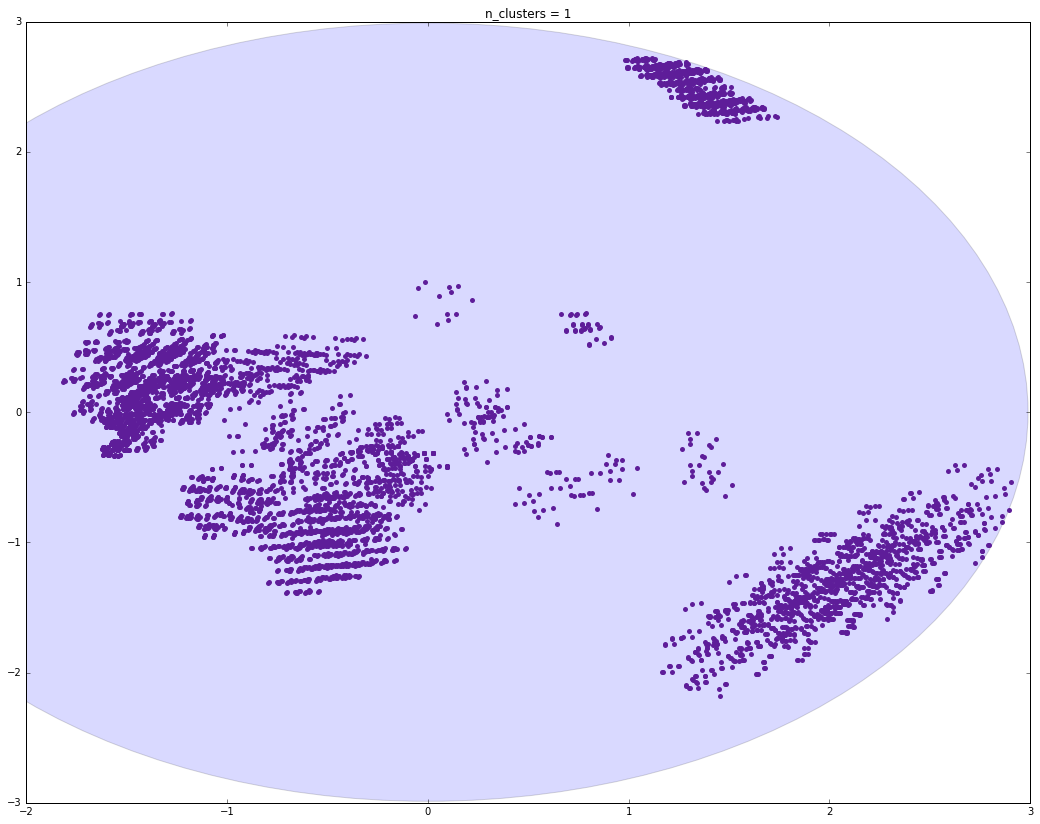

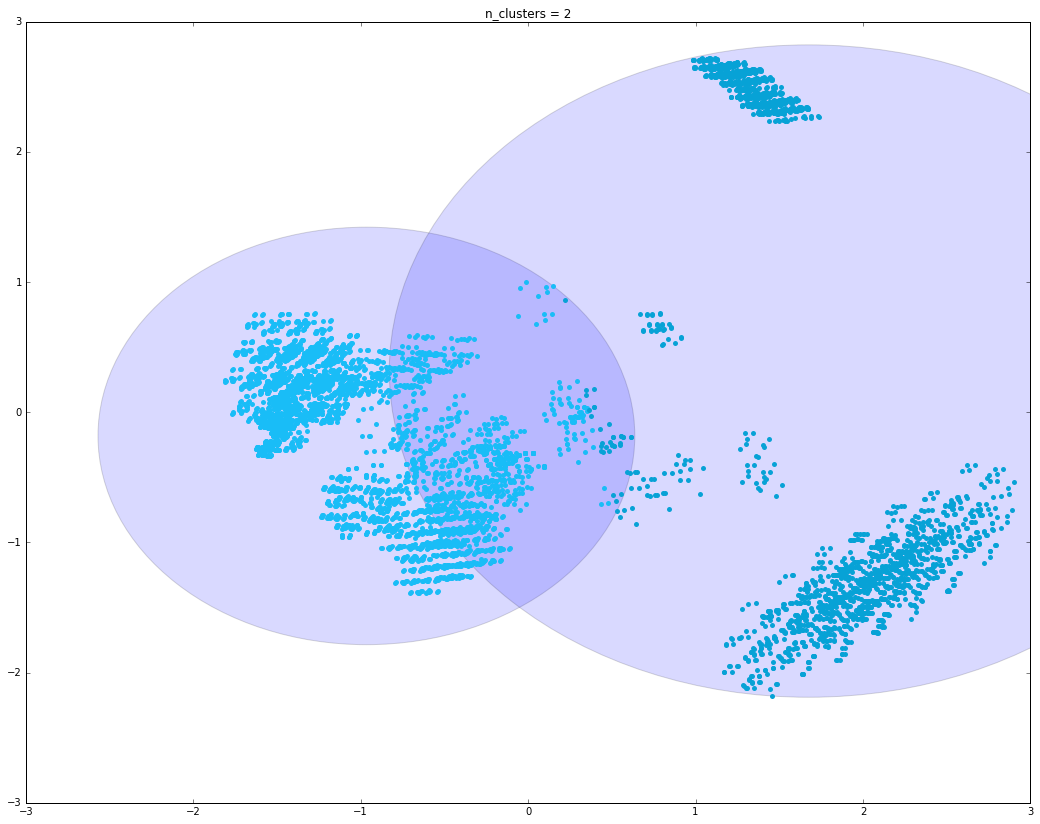

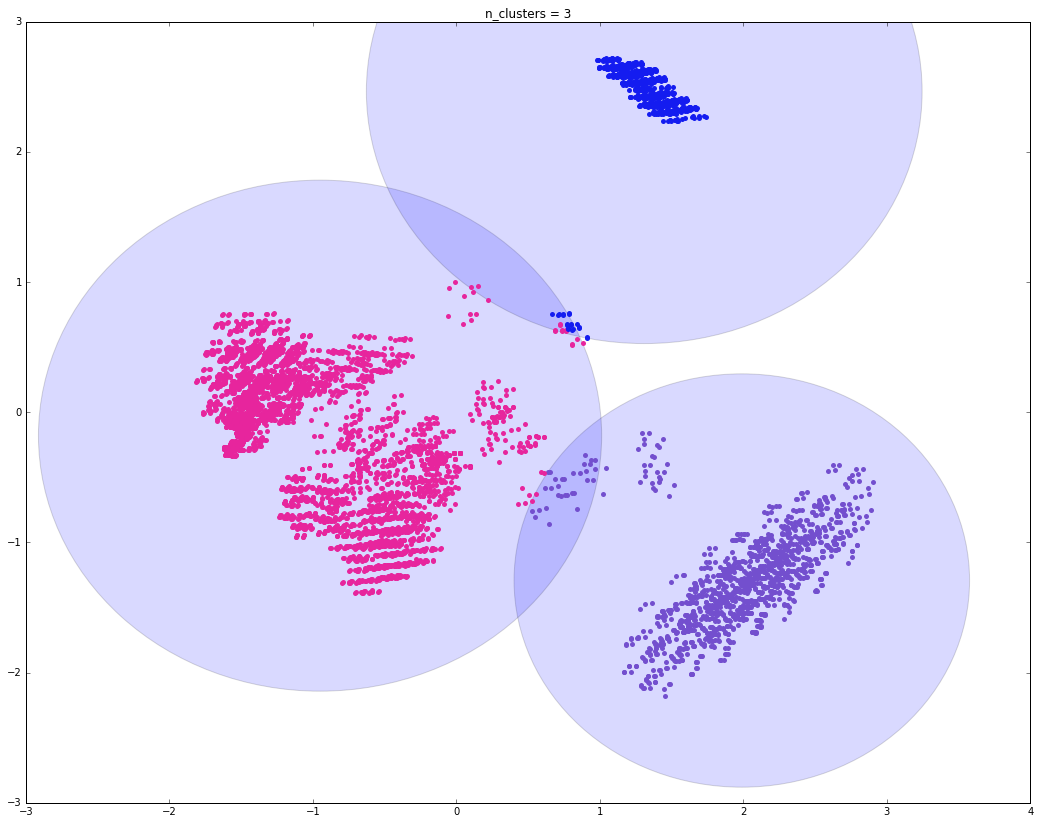

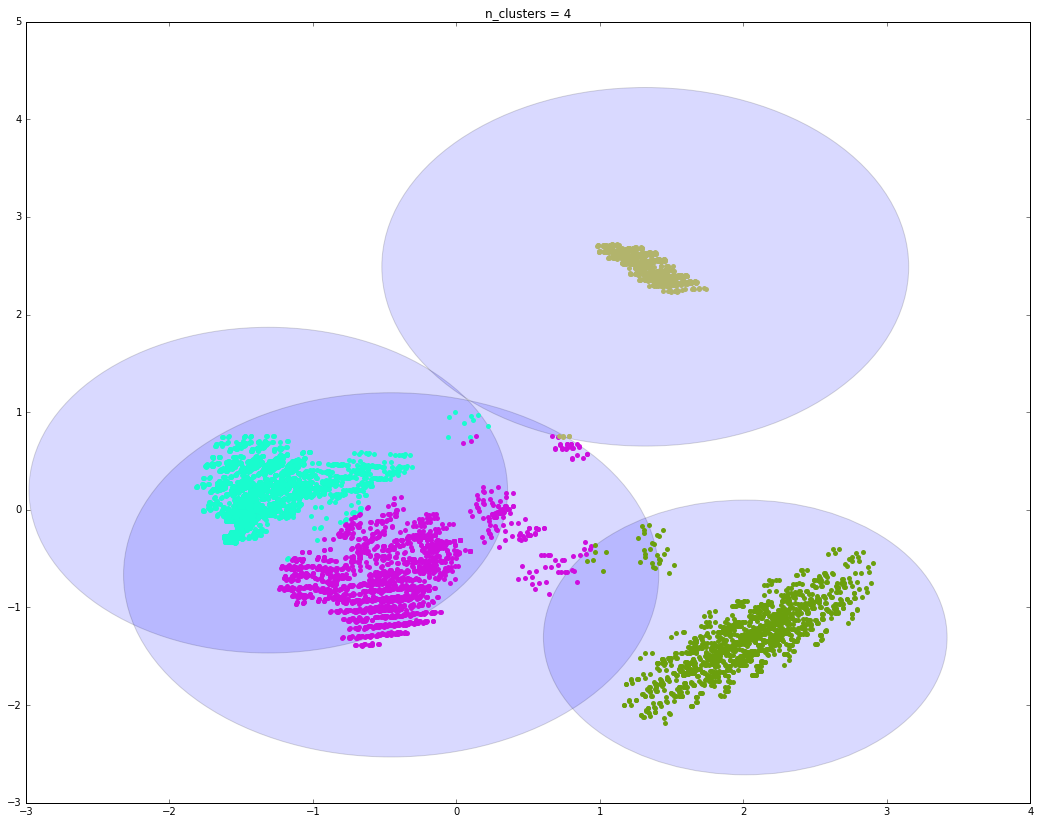

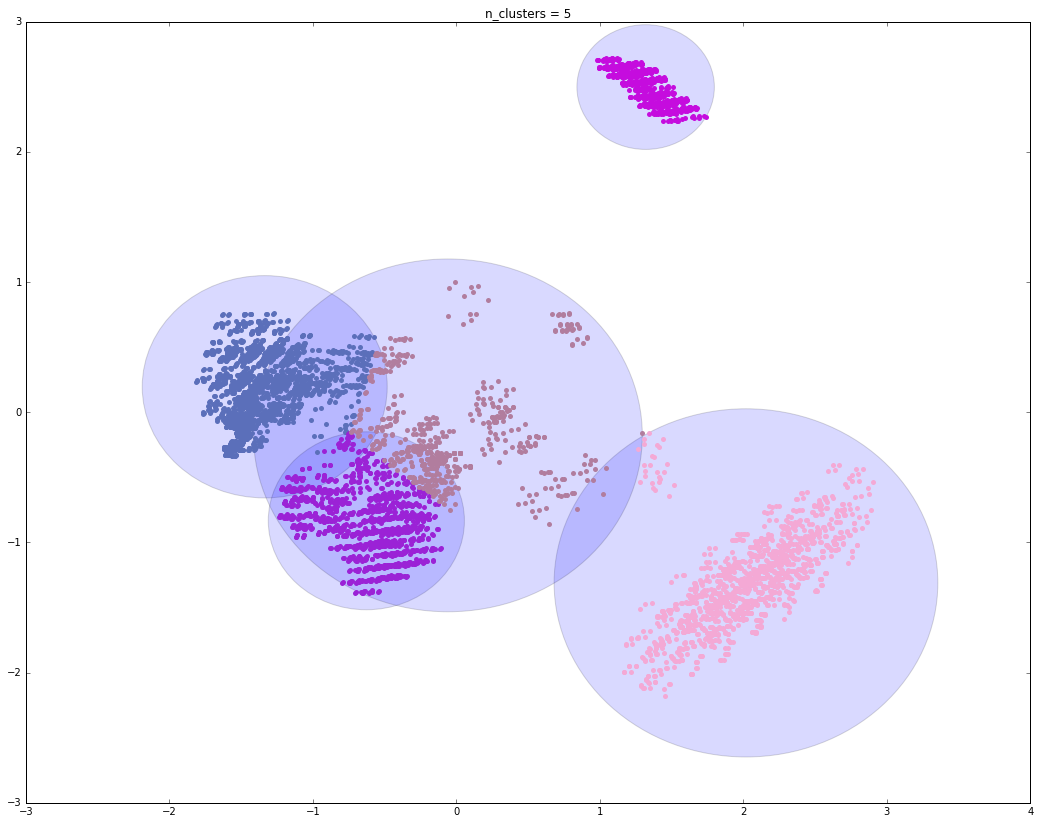

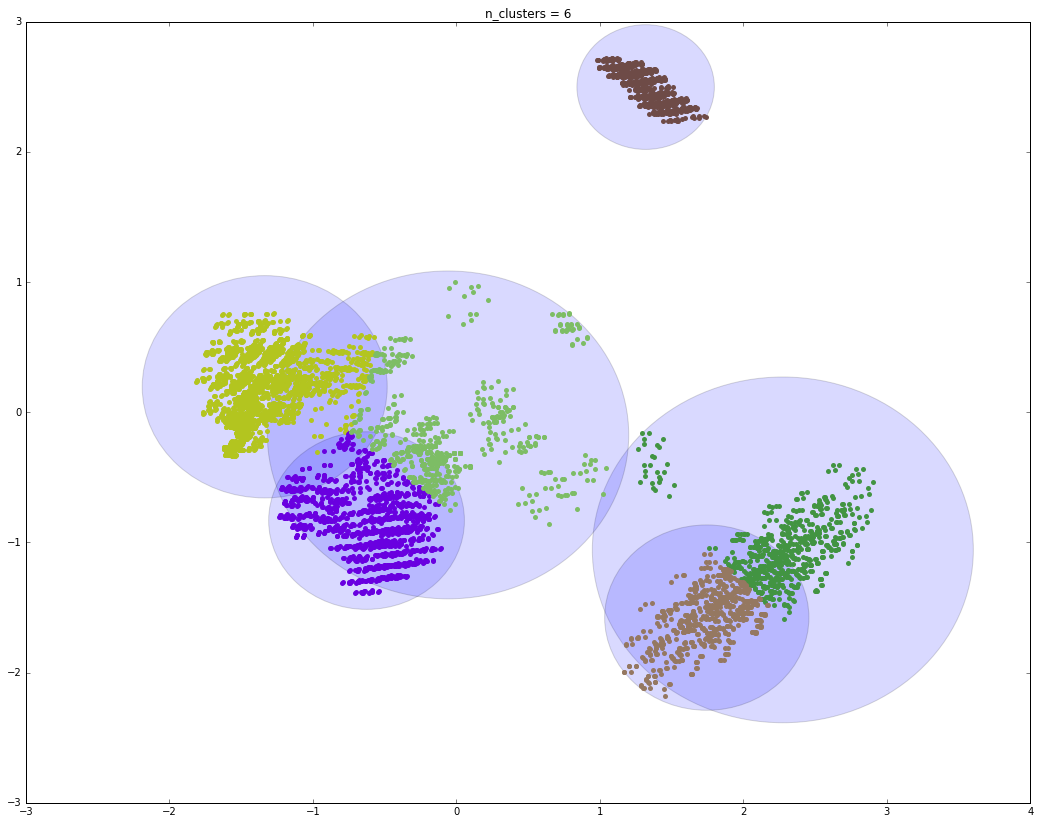

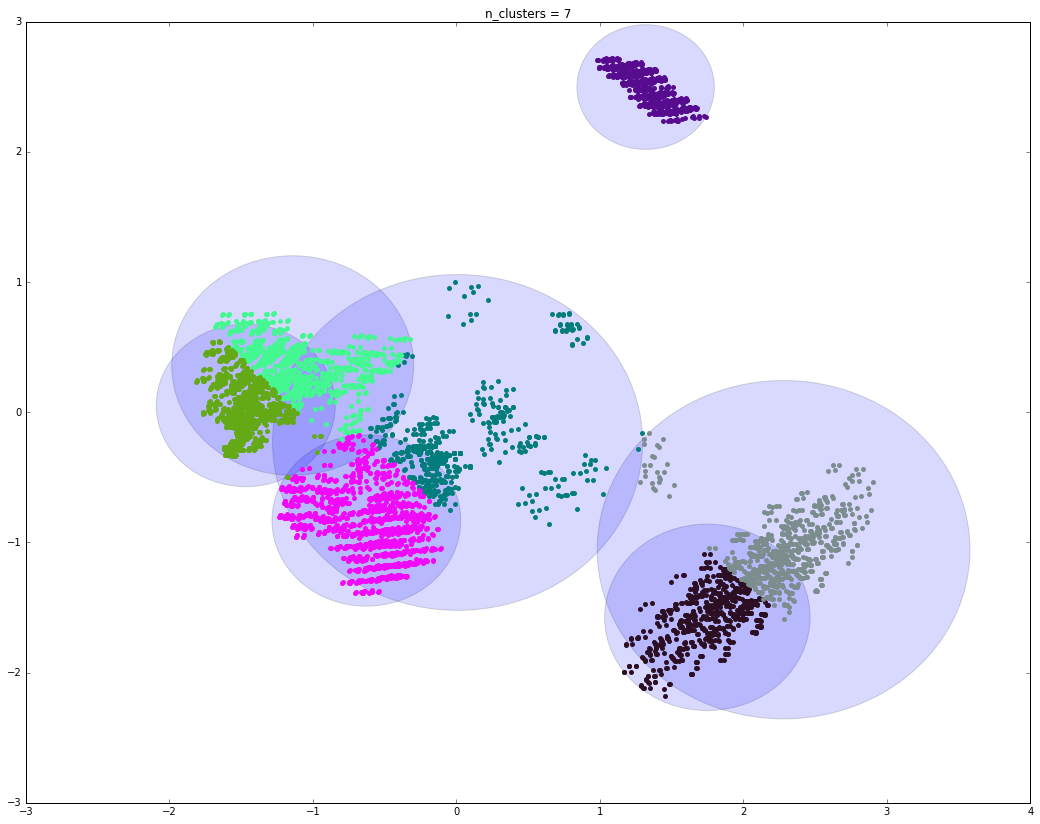

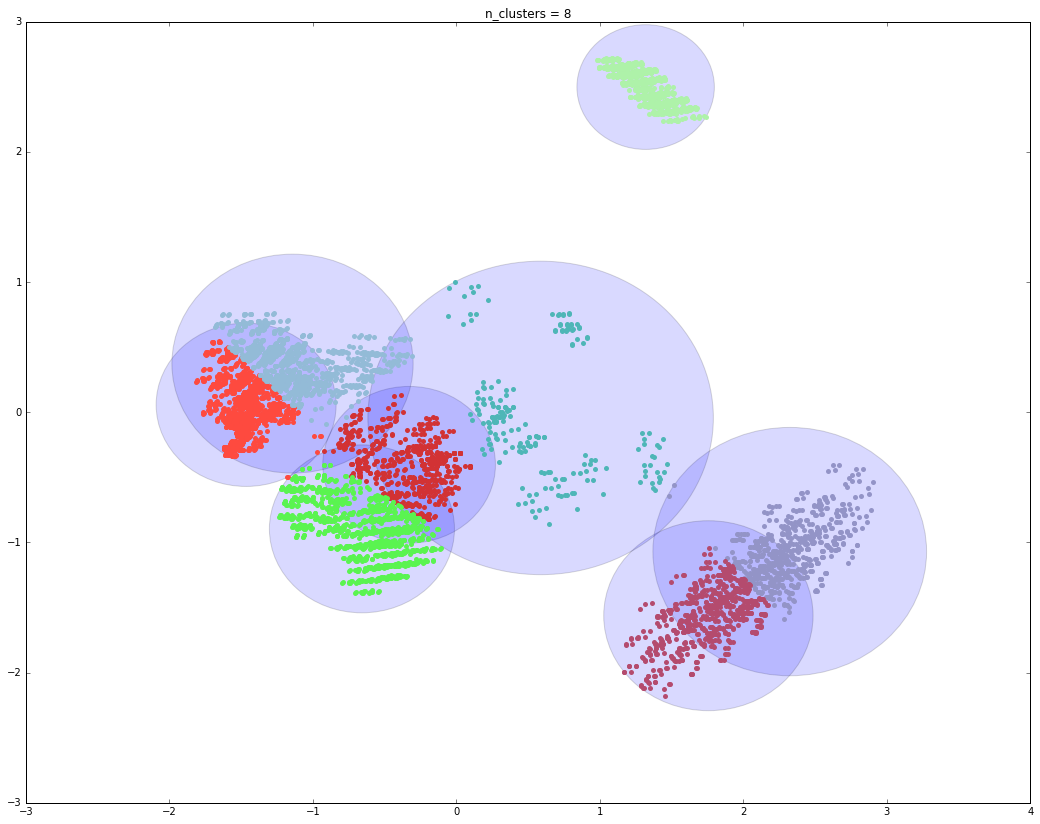

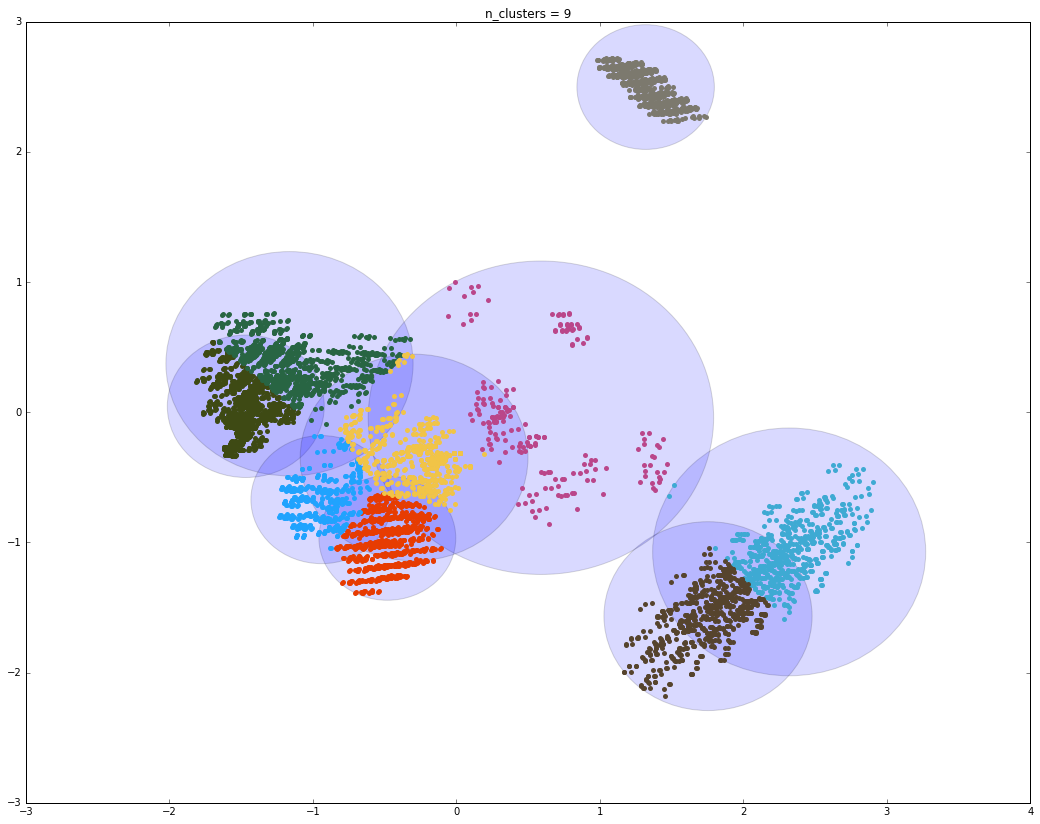

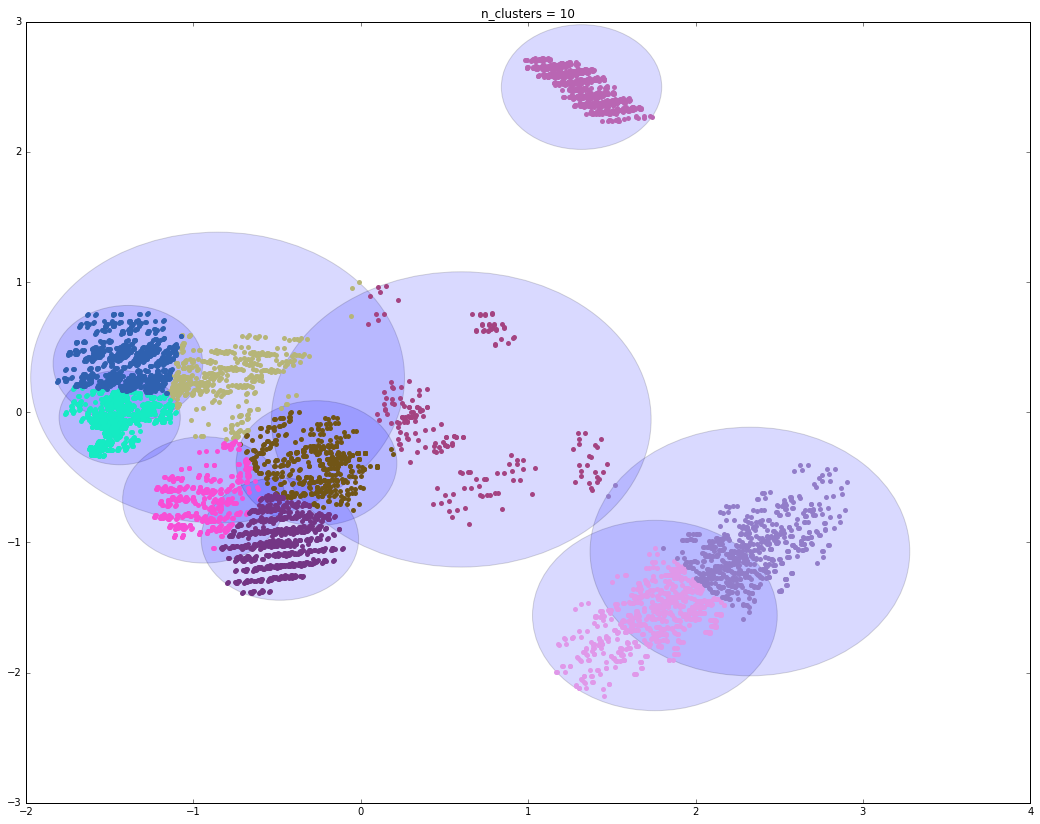

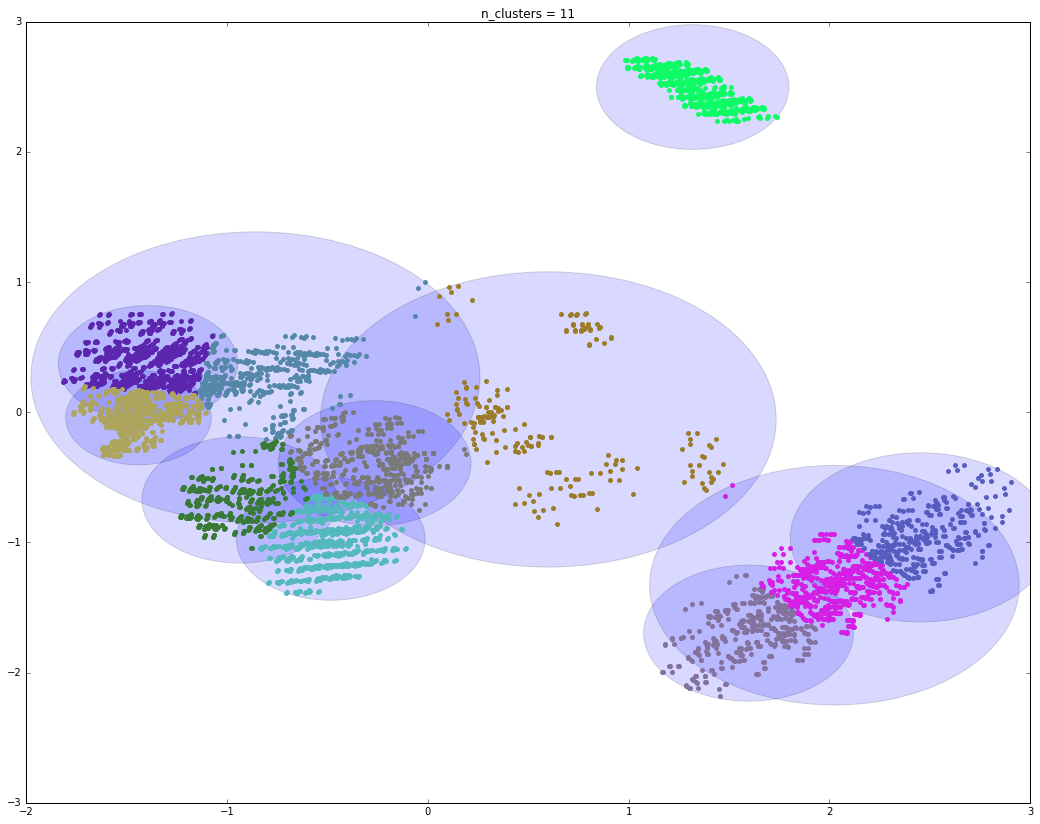

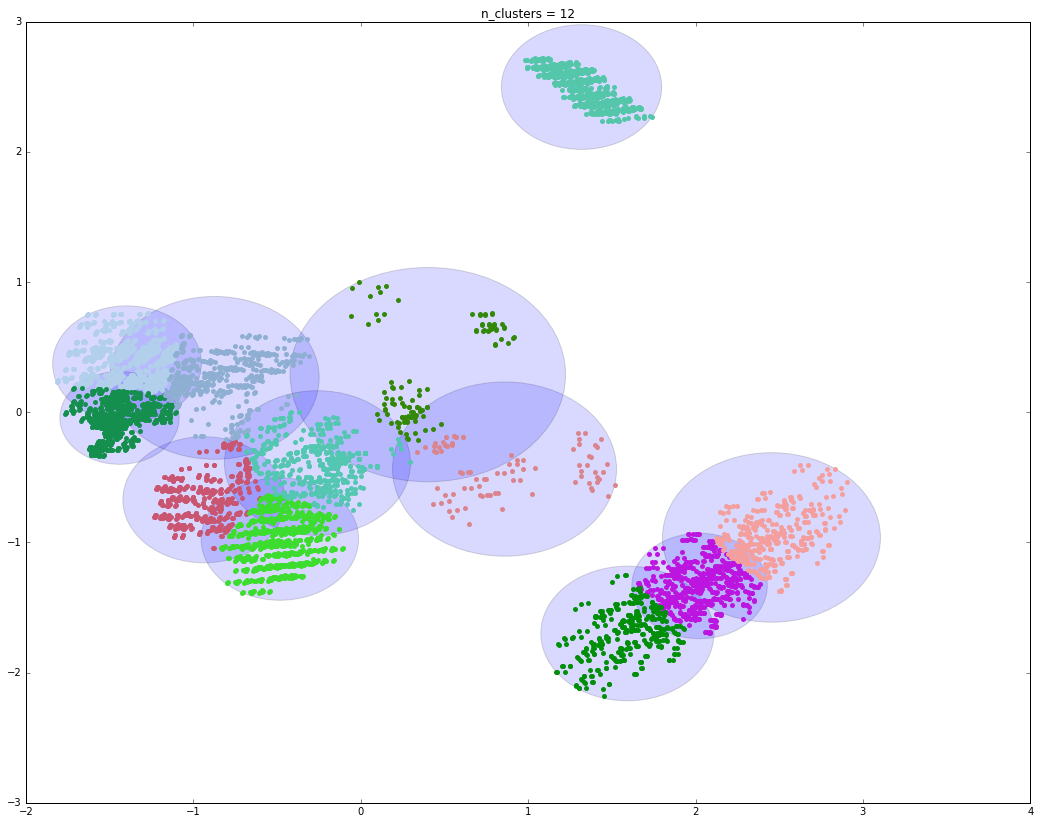

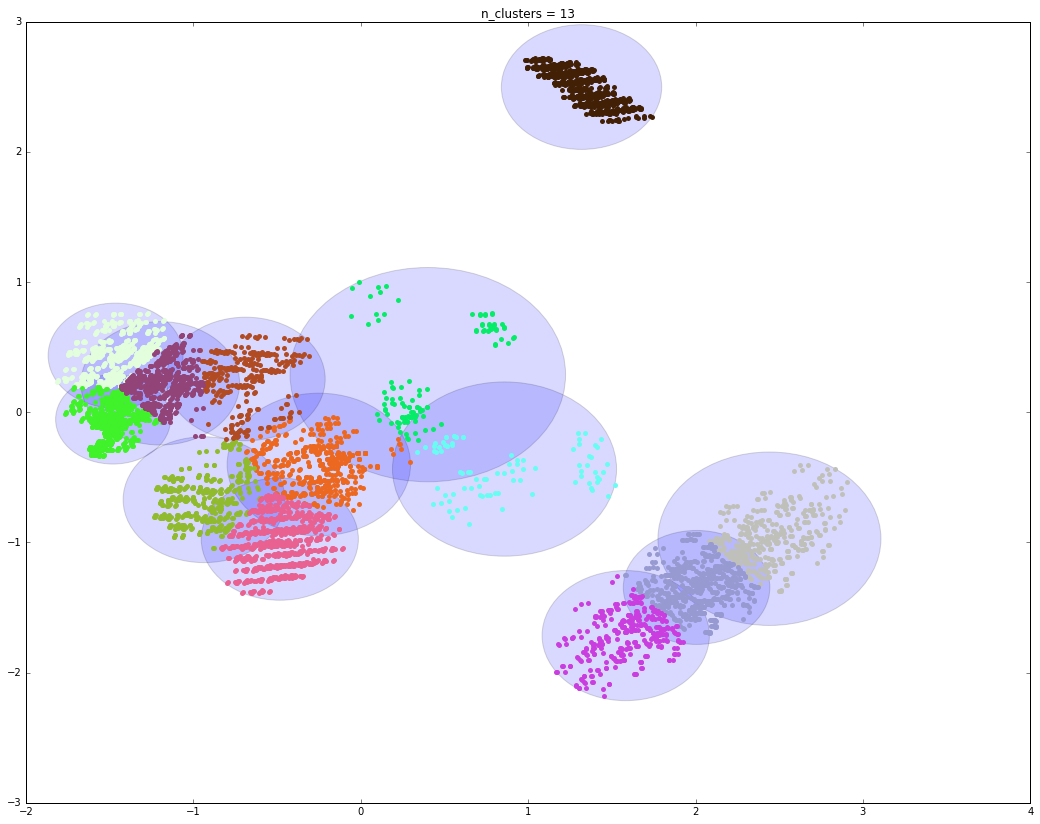

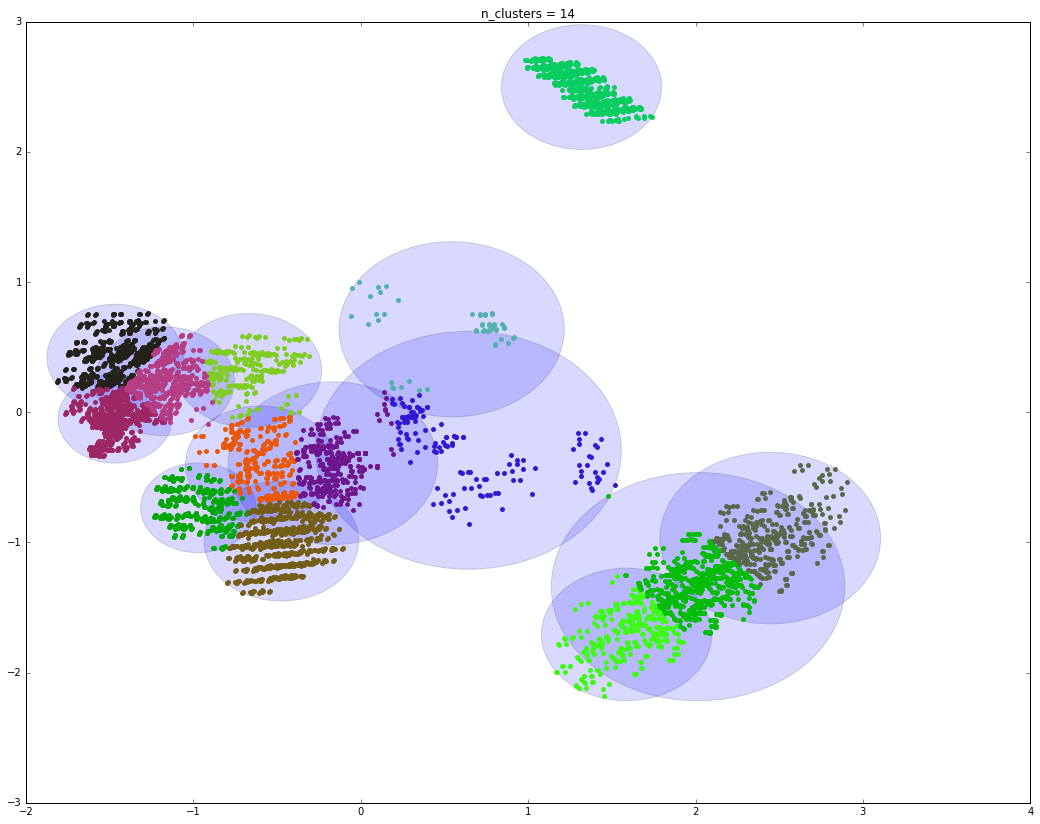

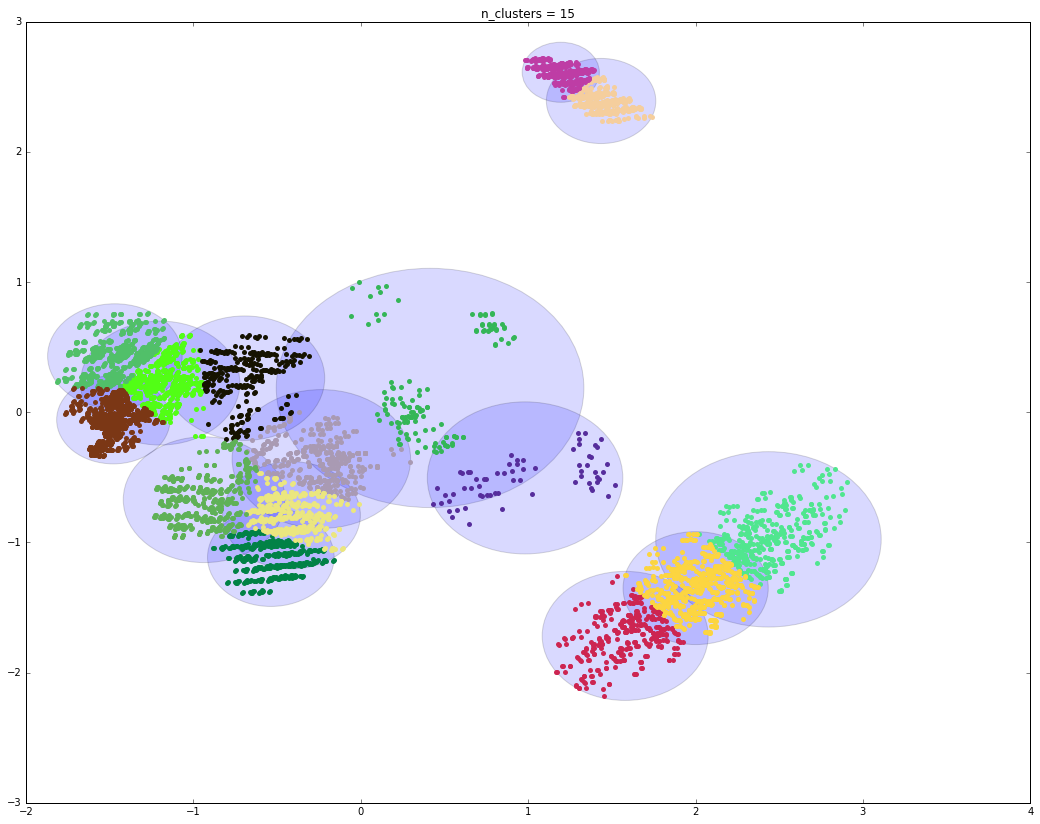

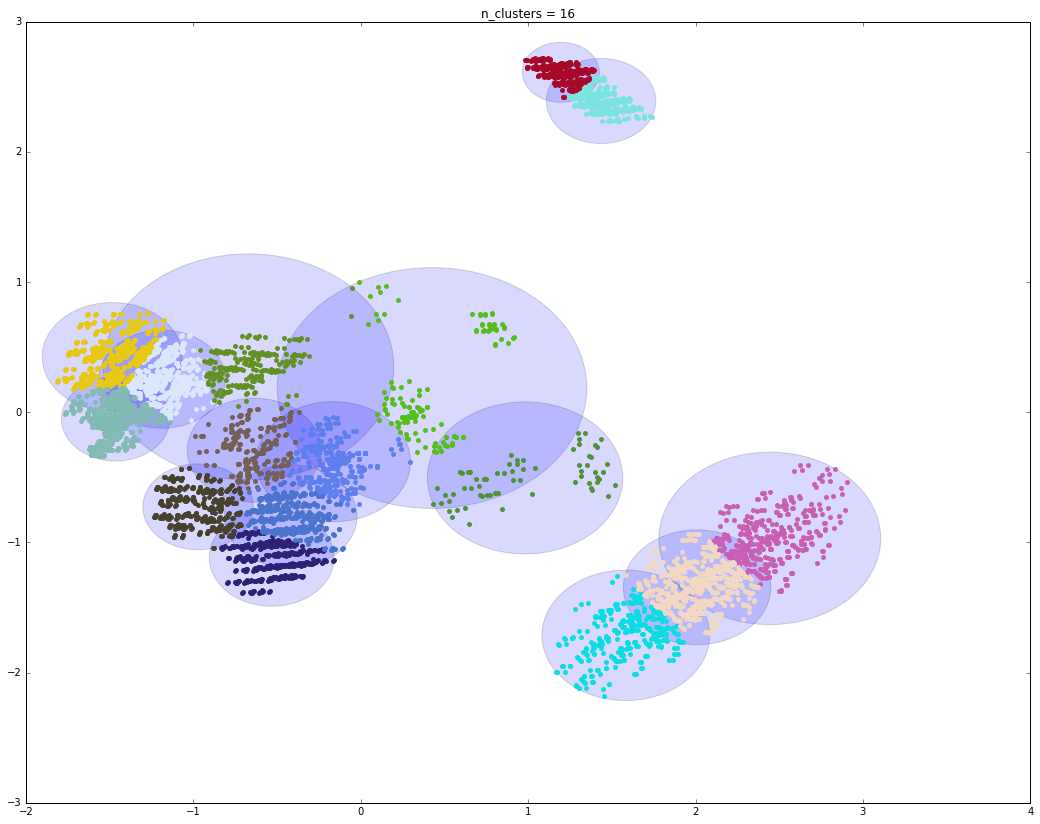

In [14]:
def P3():
    
    pca = PCA(n_components = 2)
    data = pca.fit_transform(train_data)
    
    #import matplotlib.gridspec as gridspec
    #fig = plt.figure(figsize=(18, 14)) 
    #gs = gridspec.GridSpec(4, 4)
    
    # go through the first 16 clusters
    for i in range(1,17):
        km = KMeans(n_clusters= i)
        km.fit(data)
        distances = km.transform(data)
        plt.figure(figsize=(18, 14))
        # gridspec.GridSpec(4, 4)
        # draw circles over each cluster
        for j, center in enumerate(km.cluster_centers_):
            # Give each cluster a random color
            plt.plot(data[:,0][km.labels_==j], data[:,1][km.labels_==j], 
                     color = np.random.rand(3,1), ls='None', marker='o', markersize=5, markeredgewidth=0)
            # subset each cluster distances array
            center_subset = distances[km.labels_==j]
            # get max distance from center
            max_dist = np.amax(center_subset[:, j])        
            # draw a circle around the center of the subset distances around cluster
            circle = plt.Circle(center, max_dist, clip_on = True)
            circle.set_alpha(0.15)
            circle.set_edgecolor('black')
            plt.gca().add_patch(circle)
        
        plt.title("n_clusters = " + str(i))
        plt.show()

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

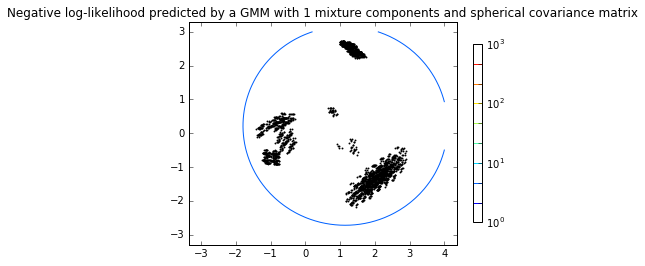

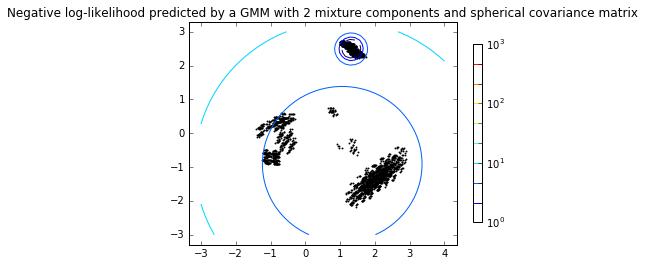

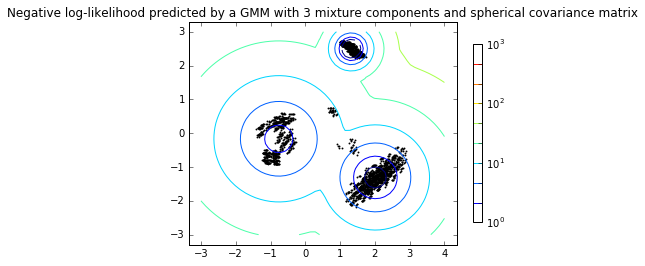

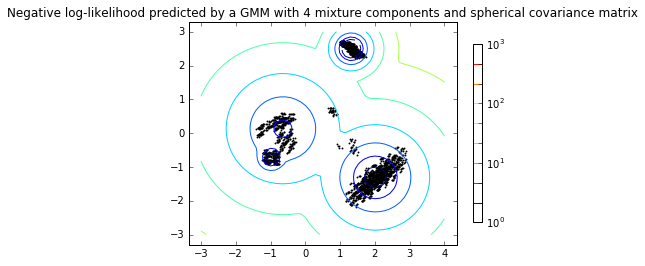

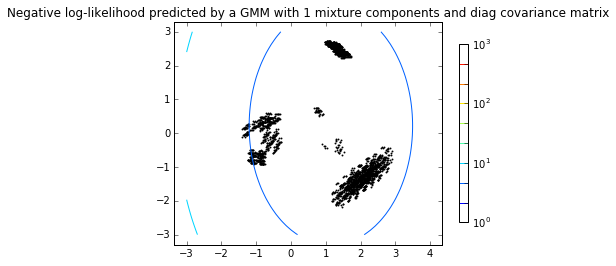

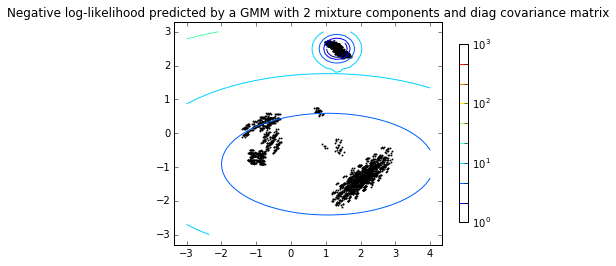

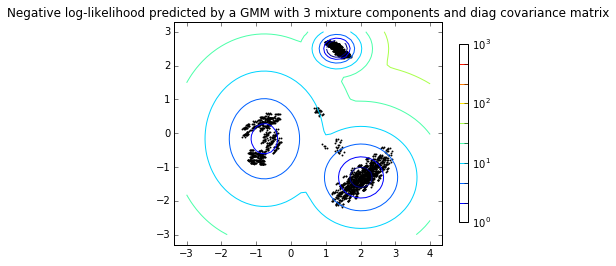

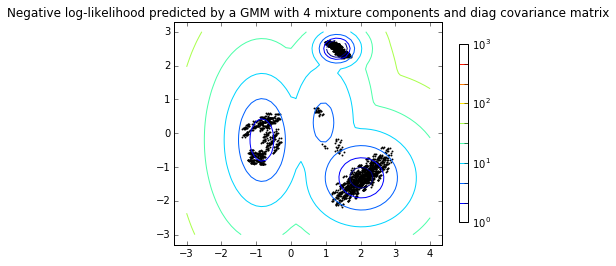

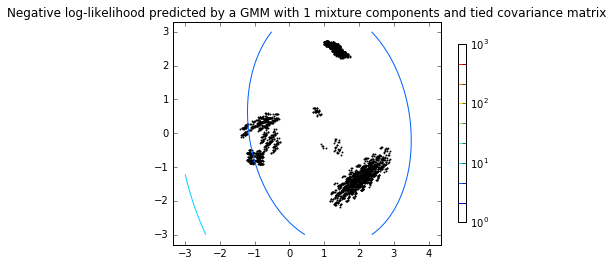

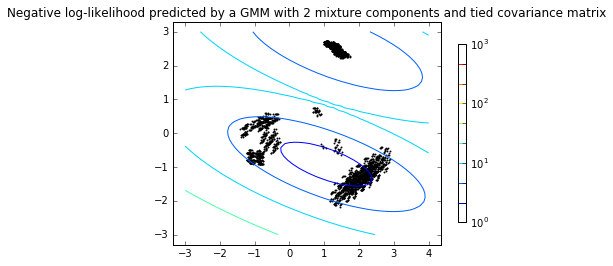

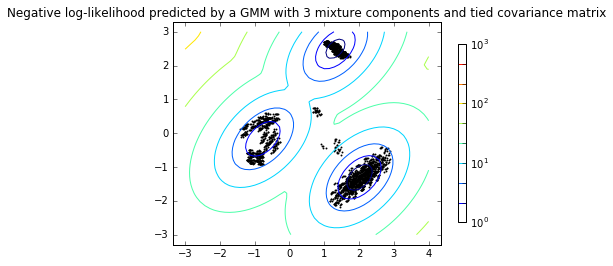

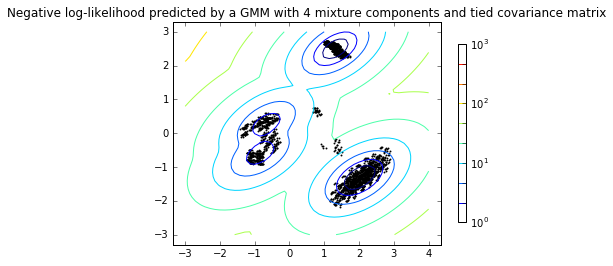

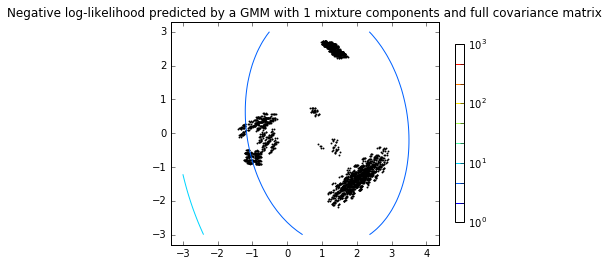

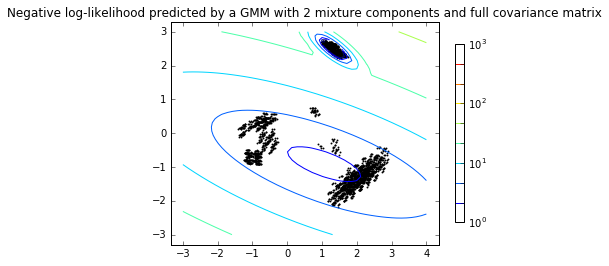

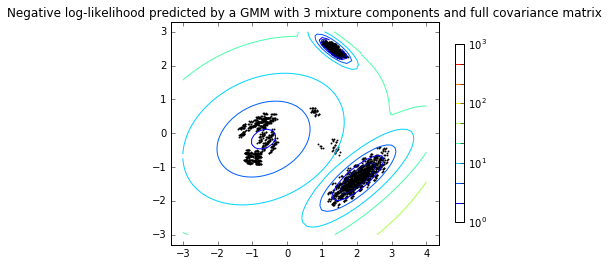

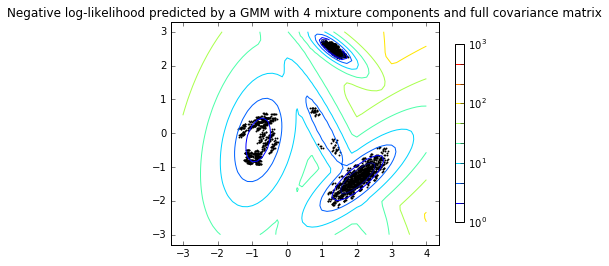

In [15]:
def P4():
    from sklearn import mixture
    
    pca = PCA(n_components = 2)
    data = pca.fit_transform(train_data)
    
    # separate the positive data from the 2d data
    positive_data = data[train_labels == 1]
    
    # define and iterate through all combinations of mixture components and covariance type
    ncomponents = (1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4)
    covariancetype = ('spherical','spherical','spherical','spherical','diag','diag','diag','diag','tied','tied','tied','tied','full','full','full','full')
    
    for i, j in zip(ncomponents, covariancetype):
        clf = mixture.GaussianMixture(n_components=i, covariance_type=j)
        clf.fit(positive_data)
        
        # display predicted scores by the model as a contour plot
        x = np.linspace(-3., 4.)
        y = np.linspace(-3., 3.)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -clf.score_samples(XX)
        Z = Z.reshape(X.shape)
        
        CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                         levels=np.logspace(0, 3, 10))
        CB = plt.colorbar(CS, shrink=0.8, extend='both')
        plt.scatter(positive_data[:, 0], positive_data[:, 1], .8)
        
        plt.title('Negative log-likelihood predicted by a GMM with ' + str(i) + ' mixture components and ' + j + ' covariance matrix')
        plt.axis('tight')
        plt.show()

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

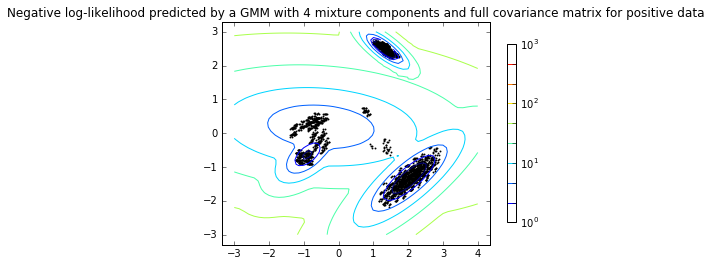

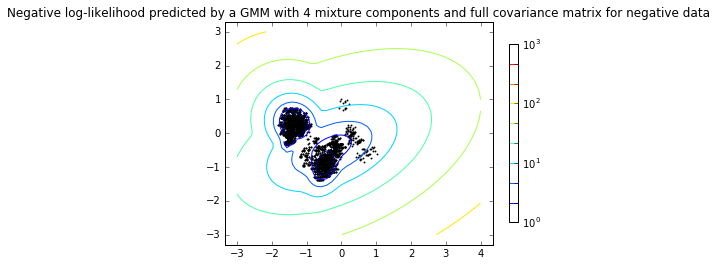

The accuracy of the GMM predictions is 95.1067615658 percent


In [16]:
def P5():
    from sklearn import mixture
    
    pca = PCA(n_components = 2)
    data = pca.fit_transform(train_data)
    
    # separate the positive and negative data from the 2d data
    positive_data = data[train_labels == 1]
    negative_data = data[train_labels == 0]
    
    # define and iterate through positive data and negative data to plot
    pos_neg = (positive_data, negative_data)
    data_labels = ('positive data', 'negative data')
    for i, j in zip(pos_neg, data_labels):
        clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
        clf.fit(i)
        
        # display predicted scores by the model as a contour plot
        x = np.linspace(-3., 4.)
        y = np.linspace(-3., 3.)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -clf.score_samples(XX)
        Z = Z.reshape(X.shape)
        
        CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                         levels=np.logspace(0, 3, 10))
        CB = plt.colorbar(CS, shrink=0.8, extend='both')
        plt.scatter(i[:, 0], i[:, 1], .8)
        
        plt.title('Negative log-likelihood predicted by a GMM with 4 mixture components and full covariance matrix for ' + j)
        plt.axis('tight')
        plt.show()
    
    pca = PCA(n_components = 2)
    data = pca.fit_transform(train_data)
    
    # separate the positive and negative data from the 2d data
    positive_data = data[train_labels == 1]
    negative_data = data[train_labels == 0]
    
    #make the test data 2d 
    test_data_2d = pca.transform(test_data)
    
    # fit the GMM model to the positive and negative data
    gm_pos = GMM(n_components=4, covariance_type='full')
    gm_pos.fit(positive_data)
    pos_probs = gm_pos.score(test_data_2d)
    gm_neg = GMM(n_components=4, covariance_type='full')
    gm_neg.fit(negative_data)
    neg_probs = gm_neg.score(test_data_2d)
    
    # predict the test labels based on the two models and calculate the accuracy
    predictions = pos_probs > neg_probs
    accuracy = 1.0 * sum(np.equal(predictions, test_labels)) / len(test_labels)
    print 'The accuracy of the GMM predictions is ' +  str(100*accuracy) + ' percent'

P5()

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [17]:
def P6():
    n_classes = 2
    parameter_list = []
    accuracy_list = []
    
    # loop over PCA n_components, covariance type, and GMM n_components
    for ncomponents in range(1,51):
        for covariancetype in ['spherical', 'tied', 'diag', 'full']:
            for gm_components in range(1,51):
                # get number of component calculations based on the covariance type
                if covariancetype == 'diag' or covariancetype == 'spherical':
                    cov_components = ncomponents
                elif covariancetype == 'full':
                    cov_components = ncomponents**2
                elif covariancetype == 'tied':   
                    cov_components = 1.0 * ncomponents**2 / gm_components
                # determine total number of paramenters
                total_params = (ncomponents + cov_components) * gm_components * n_classes
                    
                # if total number of parameters is greater than 50, then don't run
                if total_params > 50:
                    pass
                else:
                    # append parameters to one list
                    parameter_list.append((ncomponents, covariancetype, gm_components, total_params))
                    
                    pca = PCA(n_components = ncomponents)
                    data = pca.fit_transform(train_data)
                    
                    # separate the positive and negative data from the 2d data
                    positive_data = data[train_labels == 1]
                    negative_data = data[train_labels == 0]
                    
                    #make the test data 2d 
                    test_data_2d = pca.transform(test_data)
                    
                    # fit the GMM model to the positive and negative data
                    gm_pos = GMM(n_components=gm_components, covariance_type=covariancetype)
                    gm_pos.fit(positive_data)
                    pos_probs = gm_pos.score(test_data_2d)
                    gm_neg = GMM(n_components=gm_components, covariance_type=covariancetype)
                    gm_neg.fit(negative_data)
                    neg_probs = gm_neg.score(test_data_2d)
                    
                    # predict the test labels based on the two models and calculate the accuracy
                    predictions = pos_probs > neg_probs
                    accuracy = 1.0 * sum(np.equal(predictions, test_labels)) / len(test_labels)
                    accuracy_list.append(accuracy)
                    
    max_index = np.argmax(np.array(accuracy_list))
    max_accuracy = np.amax(np.array(accuracy_list))
    
    print 'The maximum accuracy is ' + str(max_accuracy) 
    print 'The opitmal parameters are ' + str(parameter_list[max_index][0]) + ' PCA n_components, ' + '"' + str(parameter_list[max_index][1]) + '"' + ' covariance matrix and ' + str(parameter_list[max_index][2]) + ' GMM n_components'

P6()

The maximum accuracy is 0.963523131673
The opitmal parameters are 3 PCA n_components, "tied" covariance matrix and 3 GMM n_components
